**Data Junkies** <br>
**Exploratory Dataset Analysis and Interpretation**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#loading data into dfor cleaning
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#Showing rows
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [27]:
#Finding the dimensionality of the data
df.shape
# There are three 7043 rows (data objects)and  21 colums (attributies)

(7043, 21)

In [28]:
#Exporting information of the dataframes columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
# There are three data types. Float64 type(1), Int64 type(2) and Object type(18)
# TotalCharges attribute should be number but here we can see it is an object datatype 
# We see that "Partner", "Dependents", "PhoneService", "PaperlessBilling" and "Churn" are now labelled as int64 (integer values)

In [30]:
df.columns.tolist()
# Names of attributies 

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [31]:
#Checking to make sure theres no missing data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
#Column Total charges was saved as an object instead of a numeric, thus processing it into numeric for analysis
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
# We are changing the object datatype to numeric 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
#Now that we've changed TotalCharges into a numeric, its possible that some data was originally missing
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
#After analysis, we've found 11 tuples with missing data, thus we'll check deeper to see what we can find out
df[df['TotalCharges'].isnull()]
# Checking the customers with NaN values for Total Charges, we see that they have 0 months of 
# tenure with the company 

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [35]:
#These customers possibly signed up for our service but then cancelled immediately, thus they don't serve as good data points for our analysis
df.dropna(inplace = True)
df.isnull().sum()
# We droped the NaN values from the TotalCharges as they are only 11 values and their values shows 'No' churn

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
# The customer IDs are unique, presumably meaning that all the customers are unique
df['customerID'].nunique() == df.shape[0]

True

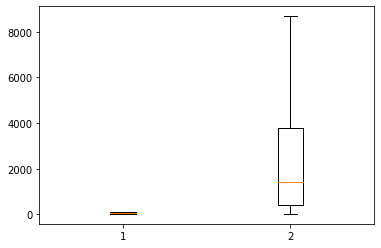

In [37]:
plt.boxplot(df[['MonthlyCharges','TotalCharges']])
plt.show()


In [38]:
# We drop the Customer ID column because it doesn't has any relationship to the churning of customers.
df = df.drop(columns=['customerID'], axis=1)

**CATEGORICAL VARIABLES**

In [39]:
#Saving the value of df into a new variable in case we need the untouched data later
df_churn = df
df_churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In order to analyse and buuild models, we converted some of the categorical variables into numbers.

In [40]:
#For consistency in our data, we'll change the way senior citizen is represented
# Replace 0 with 'No' and 1 with 'Yes', in the SeniorCitizen column
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].map({0:'No', 1:'Yes'})
# The entries of predictor variable column, Churn, is replaced with 0 or 1 (No:0, Yes:1)
df_churn['Churn'] = df_churn['Churn'].map({'No':0, 'Yes':1})
# Replace 0 with 'Male' and 1 with 'Female', in the Gender column
df_churn['gender'] = df_churn['gender'].map({'Male':0, 'Female':1})
df_churn.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0       1            No     Yes         No       1           No   
1       0            No      No         No      34          Yes   
2       0            No      No         No       2          Yes   
3       0            No      No         No      45           No   
4       1            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [41]:
bool_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for i in bool_cols:
    df_churn[i] = df_churn[i].apply(lambda x:1 if x == 'Yes' else 0)

# The InternetService, Contract, MultipleLines and PaymentMethod columns are replaced as follows:
df_churn['InternetService'] = df_churn['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
df_churn['Contract'] = df_churn['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df_churn['MultipleLines'] = df_churn['MultipleLines'].map({'No':0, 'No phone service':1, 'Yes':2})
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].map({'Bank transfer (automatic)':0, 'Credit card (automatic)':1, 
                                                 'Electronic check':2, 'Mailed check':3})


**Descriptive Statistical Analysis**

In [42]:
df_churn[['tenure','MonthlyCharges','TotalCharges']].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [43]:
# We can see from the Table that the average tenure of customers is about 32 months.
# Moreover, 25% of the customers have a tenure of 9 months or less, indicating that
# they are either newer current customers, or that they have churned.
# The average monthly charges and average total charges are $64.76 and $2283.30, respectively.
#The median represents the 0.5 quartile (50%). 
#Column "TotalCharges" shows us that the mean = 2283.30041 and the median = 1397.475000 and 
#they are not even close to each other. Hence, the mean is easily affected by the extreme values which is 
# the outliers and this may be the possible reasons behind the missing values of 11 records under this particular column.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


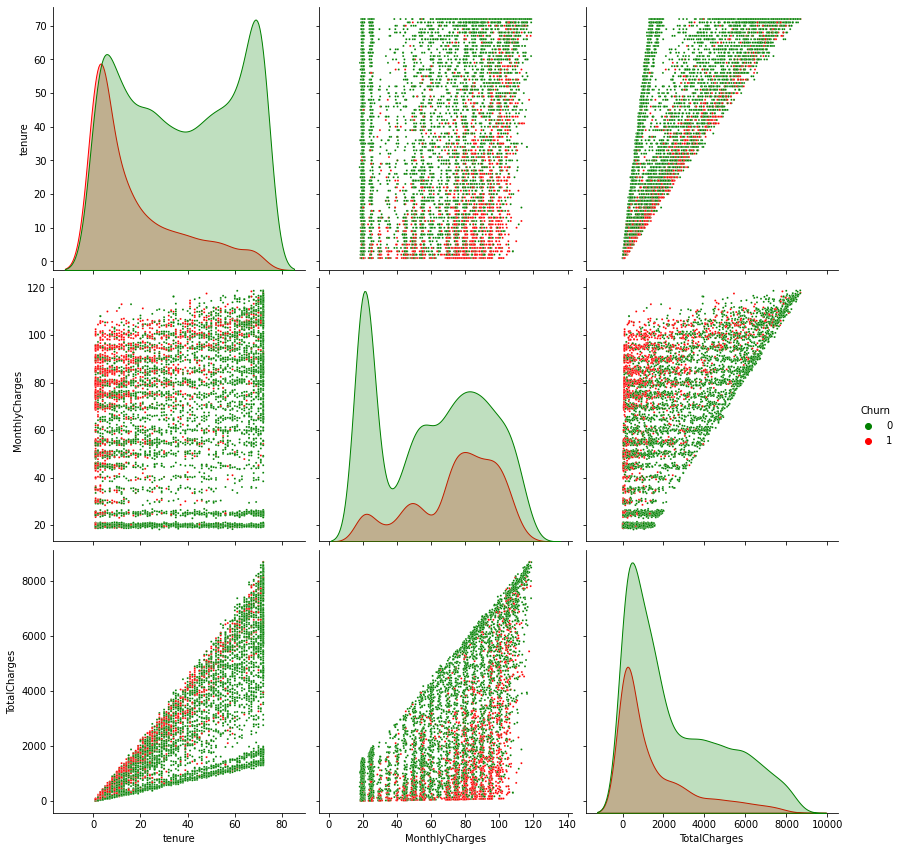

In [45]:
sns.pairplot(df_churn[['tenure','MonthlyCharges','TotalCharges','Churn']], hue='Churn', plot_kws={"s": 4}, palette=['green','red'], height=4);

In [46]:
# Both the ‘tenure’ and ‘MonthlyCharges’ are a good predictors of the ‘Churn’ variable

In [47]:
# Create a new variable 'FamilySize' as the sum of 'Partner' and 'Dependents',
# which can therefore take values of 0, 1 or 2. Drop 'Partner' and 'Dependents'.
df_churn['FamilySize'] = df_churn['Partner'] + df_churn['Dependents']
df_churn = df_churn.drop(['Partner','Dependents'], axis=1)

In [48]:
# Create a new variable 'AdditionalInternetServices' whose entries have value 1 if any of the variables
# 'OnlineSecurity', OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies' 
# have value 1, otherwise the entries have value 0. (That is, it is 1 if the customer has additional 
# internet services, and 0 otherwise.)
df_churn['AdditionalInternetServices'] = df_churn['OnlineSecurity'] + df_churn['OnlineBackup'] + df_churn['DeviceProtection'] + df_churn['TechSupport'] + df_churn['StreamingTV'] + df_churn['StreamingMovies']
df_churn = df_churn.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis=1)
df_churn['AdditionalInternetServices'] = df_churn['AdditionalInternetServices'].apply(lambda x:0 if x == 0 else 1)

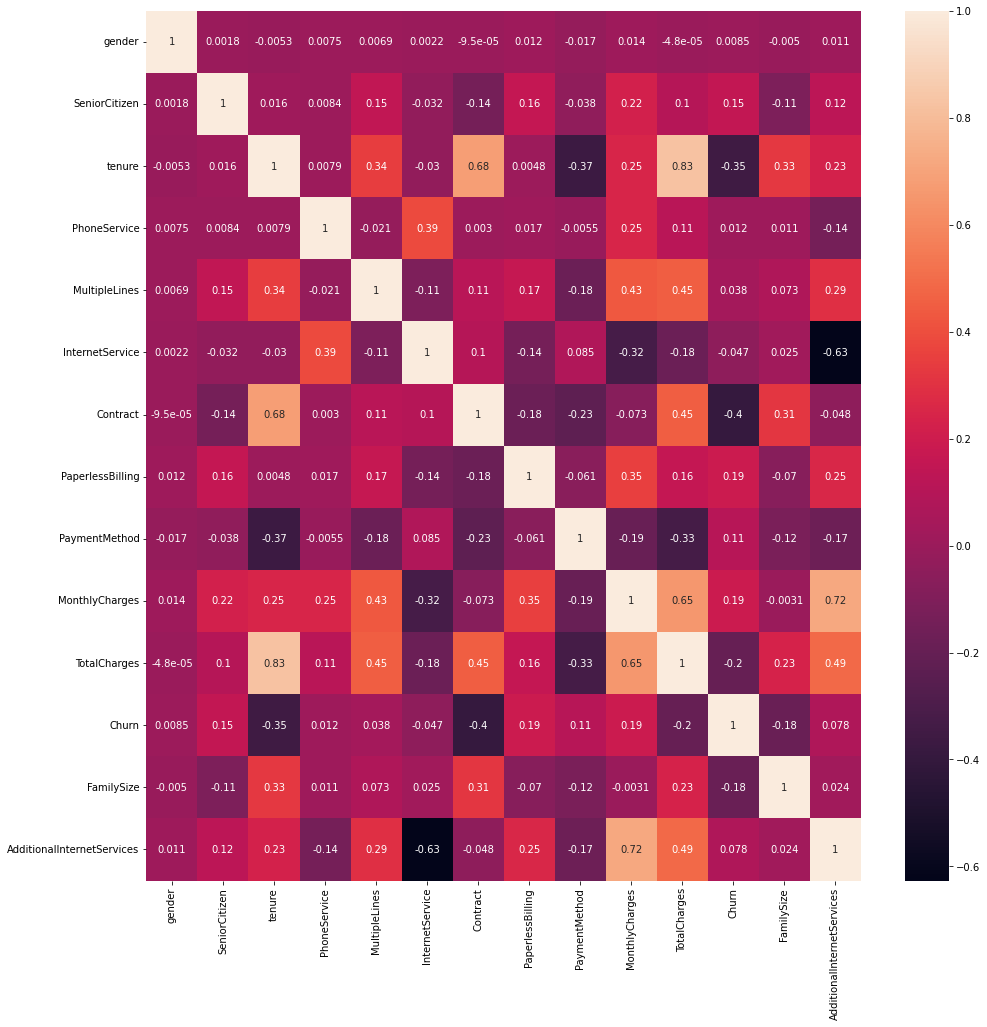

In [49]:
# Correlation Heatmap Matrix of all the variables
plt.figure(figsize=(16,16))
sns.heatmap(df_churn.corr(),annot=True,fmt='.2g');

In [50]:
# We can see that the following variables are very weakly correlated with Churn, and therefore
# unlikely to be directly useful in a single variable analysis: 'Gender', 'PhoneService', and
# 'MultipleLines'. 

# The remaining variables exhibit a stronger correlation with Churn, especially 'Tenure' and 'Contract'.

# Although 'TotalCharges' has a -0.2 correlation with Churn, it also has a very strong correlation with
# other variables, especially 'Tenure', which are likely more useful in explaining Churn in our 
# analysis. (Obviously, customers are no longer charged once they have churned.)

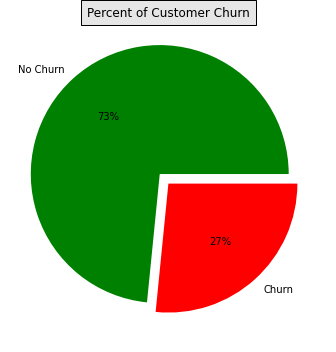

In [51]:
# Pie plot of Churn
churn_values = df_churn['Churn'].value_counts()/df_churn['Churn'].shape[0]
plt.figure(figsize=(10, 5))
plt.pie(churn_values, labels=["No Churn", "Churn"], explode=[0.1, 0], autopct='%.00f%%', colors=['green','red'])
plt.title("Percent of Customer Churn", bbox={'facecolor':'0.9', 'pad':6})
plt.tight_layout()
#plt.legend()
plt.show()


In [52]:
df_churn.groupby('Churn').size()

Churn
0    5163
1    1869
dtype: int64

0    3549
1    3483
Name: gender, dtype: int64
Percentage of Gender in the dataset

0    50.469283
1    49.530717
Name: gender, dtype: float64


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


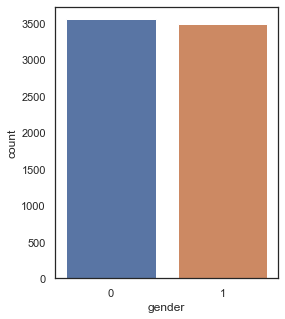

In [53]:
print(df_churn['gender'].value_counts())
print('Percentage of Gender in the dataset\n')
print((df_churn['gender'].value_counts()/df_churn.shape[0])*100)

sns.set(rc = {'figure.figsize':(4,5)}, style='white')
sns.countplot(df_churn['gender']);

We can see that the churn rate is almost equal in the case of gender, where it doesn't really matter whether it is a female or male, and the percentage of churn rate is lower in the sense of senior citizens and customers with partners are less likely to churn as well.

In [54]:
df_churn.groupby('gender')[['Churn']].mean()

Churn
gender          
0       0.262046
1       0.269595

0    50.469283
1    49.530717
Name: gender, dtype: float64


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


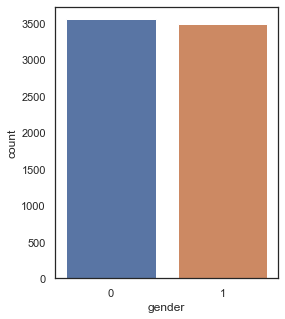

In [55]:
print((df_churn['gender'].value_counts()/df_churn.shape[0])*100)
sns.set(rc = {'figure.figsize':(4,5)}, style='white')
sns.countplot(df_churn['gender']);

In [56]:
df_churn.groupby('gender')[['Churn']].mean()
# Almost the same percentage from each gender have the tendency to churn (less than 1% difference),
# as expected from the very low correlation

Churn
gender          
0       0.262046
1       0.269595

0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


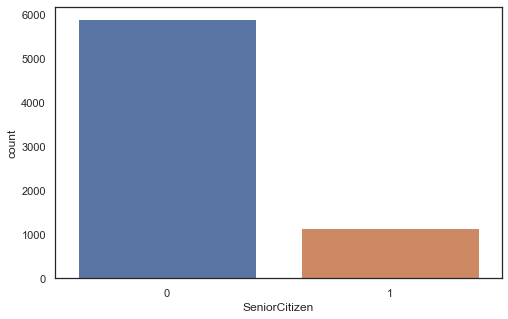

In [87]:
# Print the percentage of senior and non-senior customers
print((df_churn['SeniorCitizen'].value_counts()/df_churn.shape[0])*100)
sns.countplot(df_churn['SeniorCitizen']);

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn             0     1
SeniorCitizen            
0              76.3  23.7
1              58.3  41.7

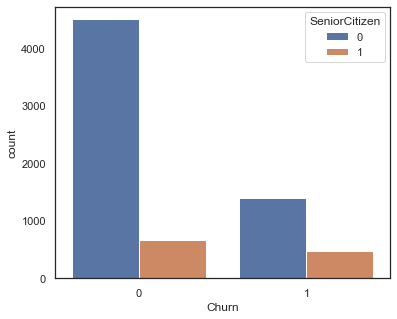

In [89]:
sns.set(rc = {'figure.figsize':(6,5)}, style='white')
sns.countplot(df['Churn'], hue= df['SeniorCitizen'])
pd.crosstab(df['SeniorCitizen'], df['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# We can see that the churning rate depends on family size, with customers of increasing family size having
# decreasing churning rates. Single individuals are about 10% more likely to churn than those with 
# family size 1, who are about 10% more likely to churn than those with family size 2.

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn          0     1
FamilySize            
0           65.8  34.2
1           75.3  24.7
2           85.7  14.3

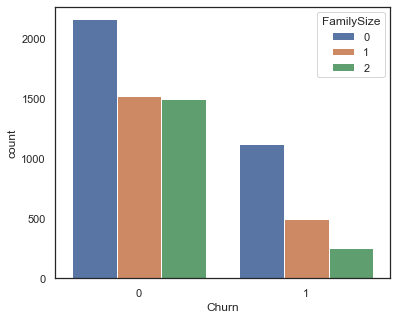

In [58]:
sns.set(rc = {'figure.figsize':(6,5)}, style='white')
sns.countplot(df['Churn'], hue= df['FamilySize'])
pd.crosstab(df['FamilySize'], df['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# We can see that the churning rate depends on family size, with customers of increasing family size having
# decreasing churning rates. Single individuals are about 10% more likely to churn than those with 
# family size 1, who are about 10% more likely to churn than those with family size 2.

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn        0     1
Contract            
0         57.3  42.7
1         88.7  11.3
2         97.2   2.8

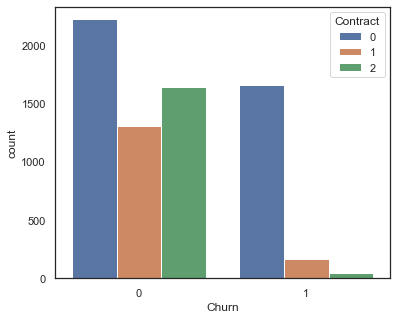

In [90]:
sns.set(rc = {'figure.figsize':(6,5)}, style='white')
sns.countplot(df['Churn'], hue= df['Contract'])
pd.crosstab(df['Contract'], df['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# We can see that the churning rate depends on family size, with customers of increasing family size having
# decreasing churning rates. Single individuals are about 10% more likely to churn than those with 
# family size 1, who are about 10% more likely to churn than those with family size 2.

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn               0     1
InternetService            
0                81.0  19.0
1                58.1  41.9
2                92.6   7.4

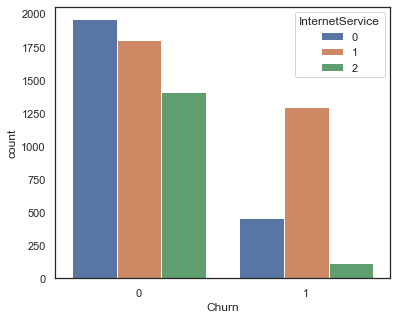

In [59]:
sns.countplot(df_churn['Churn'], hue= df_churn['InternetService'])
pd.crosstab(df_churn['InternetService'], df_churn['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# Customers with DSL are slightly over 20% less likely to churn than those with Fiber optic internet
# (Although customers with no internet are much less likely to churn overall, they are also not
# paying for internet service, which would presumably reduce profits)

In [60]:
# Create a new variable 'AdditionalInternetServices' whose entries have value 1 if any of the variables
# 'OnlineSecurity', OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies' 
# have value 1, otherwise the entries have value 0. (That is, it is 1 if the customer has additional 
# internet services, and 0 otherwise.)
df['AdditionalInternetServices'] = df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] + df['TechSupport'] + df['StreamingTV'] + df['StreamingMovies']
df = df.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis=1)
df['AdditionalInternetServices'] = df['AdditionalInternetServices'].apply(lambda x:0 if x == 0 else 1)

In [61]:
# Create a new dataframe, filtered only for those customers with Internet service
df_filtered = df[df['InternetService'] != 0]
df_filtered

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4          1              0        0           0       2             1   
5          1              0        0           0       8             1   
6          0              0        0           1      22             1   
8          1              0        1           0      28             1   
11         0              0        0           0      16             1   
...      ...            ...      ...         ...     ...           ...   
7035       0              0        0           0      19             1   
7037       1              0        0           0      72             1   
7039       1              0        1           1      72             1   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  InternetService  Contract  PaperlessBilling  \
4                 0                1         0                 1   
5                 2                1         0                 1   
6                 2                1         0                 1   
8                 2                1         0                 1   
11                0                2         2                 0   
...             ...              ...       ...               ...   
7035              0                1         0                 1   
7037              0                2         2                 1   
7039              2                1         1                 1   
7041              2                1         0                 1   
7042              0                1         2                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  FamilySize  \
4                 2           70.70        151.65      1           0   
5                 2           99.65        820.50      1           0   
6                 1           89.10       1949.40      0           1   
8                 2          104.80       3046.05      1           1   
11                1           18.95        326.80      0           0   
...             ...             ...           ...    ...         ...   
7035              0           78.70       1495.10      0           0   
7037              0           21.15       1419.40      0           0   
7039              1          103.20       7362.90      0           2   
7041              3           74.40        306.60      1           1   
7042              0          105.65       6844.50      0           0   

      AdditionalInternetServices  
4                              0  
5                              1  
6                              1  
8                              1  
11                             0  
...                          ...  
7035                           1  
7037                           0  
7039                           1  
7041                           0  
7042                           1  

[4616 rows x 16 columns]

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn                          0     1
AdditionalInternetServices            
0                           81.6  18.4
1                           60.8  39.2

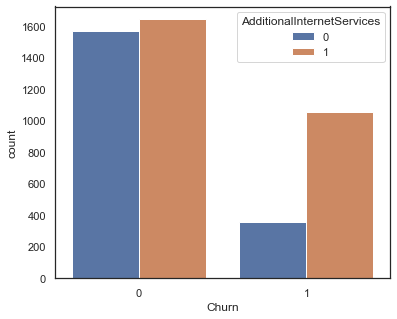

In [62]:
sns.countplot(df_filtered['Churn'], hue= df_filtered['AdditionalInternetServices'])
pd.crosstab(df_filtered['AdditionalInternetServices'], df_filtered['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# We can see that of the subset of customers with internet service, the churning rate is slightly more 
# than twice has high (39.1 vs. 18.4) in those customers without additional internet services compare 
# to those with at least one such service.

In [63]:
df_churn.groupby('Contract')[['Churn']].mean()
# The lower the term of the contract that the customers signs with the company, the much greater
# the likelihood that they will churn. It is clearly better to encourage customers to sign longer
# term contracts.

Churn
Contract          
0         0.427097
1         0.112772
2         0.028487

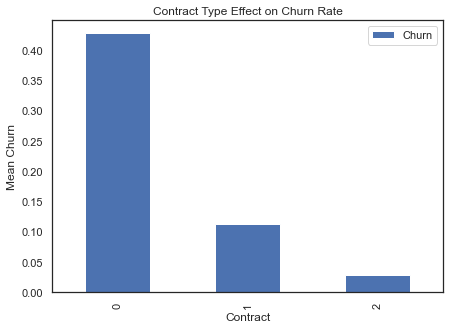

In [64]:
bar_contract = df_churn.groupby('Contract')[['Churn']].mean()
bar_contract.plot(kind='bar', title='Contract Type Effect on Churn Rate', ylabel='Mean Churn',
         xlabel='Contract', figsize=(7, 5));

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn        0     1
Contract            
0         57.3  42.7
1         88.7  11.3
2         97.2   2.8

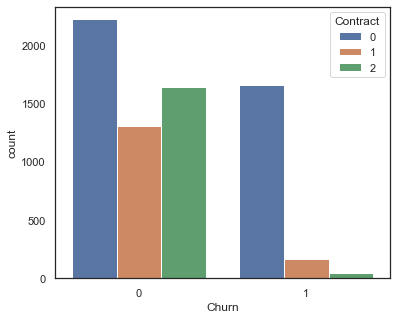

In [65]:
sns.set(rc = {'figure.figsize':(6,5)}, style='white')
sns.countplot(df_churn['Churn'], hue= df_churn['Contract'])
pd.crosstab(df_churn['Contract'], df_churn['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn                0     1
PaperlessBilling            
0                 83.6  16.4
1                 66.4  33.6

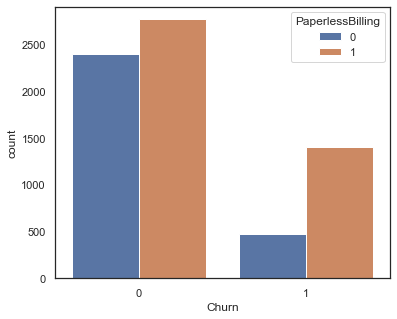

In [66]:
sns.countplot(df_churn['Churn'], hue= df_churn['PaperlessBilling'])
pd.crosstab(df_churn['PaperlessBilling'], df_churn['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# Customers with paperless billing are about twice as likely to churn (about 34% vs. 16%). However, merely encouraging
# customers to remain on paper billing may not be a good strategy.

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn             0     1
PaymentMethod            
0              83.3  16.7
1              84.7  15.3
2              54.7  45.3
3              80.8  19.2

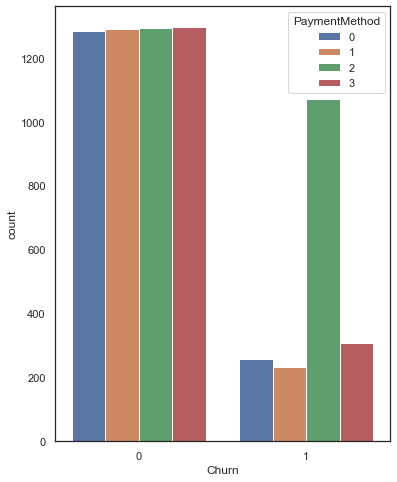

In [67]:
sns.set(rc = {'figure.figsize':(6,8)}, style='white')
sns.countplot(df_churn['Churn'], hue= df_churn['PaymentMethod'])
pd.crosstab(df_churn['PaymentMethod'], df_churn['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# Automating the payment method makes the customers more likely to stay by approximately 20% more than electronic checks.

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn             0     1
PaymentMethod            
0              83.3  16.7
1              84.7  15.3
2              54.7  45.3
3              80.8  19.2

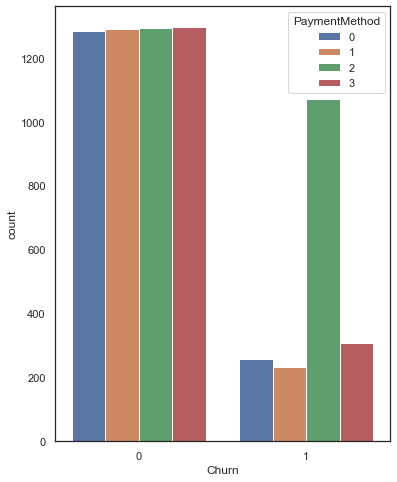

In [68]:
sns.set(rc = {'figure.figsize':(6,8)}, style='white')
sns.countplot(df_churn['Churn'], hue= df_churn['PaymentMethod'])
pd.crosstab(df_churn['PaymentMethod'], df_churn['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)
# Automating the payment method makes the customers more likely to stay by approximately 20% more than electronic checks.

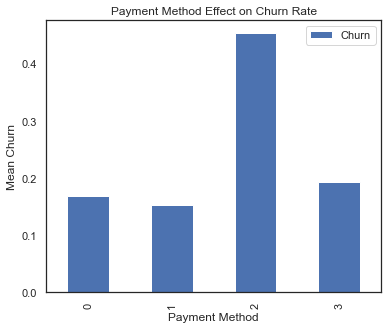

In [69]:
bar_pm = df_churn.groupby('PaymentMethod')[['Churn']].mean()

bar_pm.plot(kind='bar', title='Payment Method Effect on Churn Rate', ylabel='Mean Churn',
         xlabel='Payment Method', figsize=(6, 5));

**NUMERICAL VARIABLE ANALYSIS**

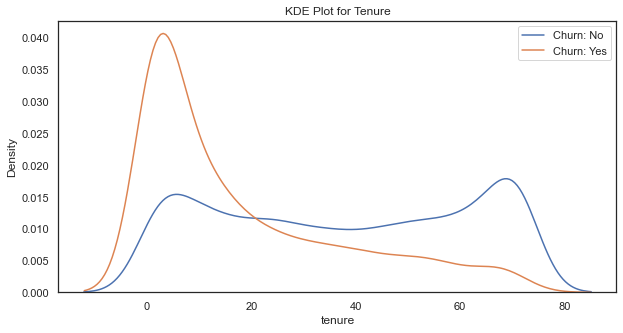

In [70]:
plt.figure(figsize=(10, 5))
plt.title("KDE Plot for Tenure")
sns.kdeplot(df[df['Churn']==0]['tenure'], label='Churn: No')
sns.kdeplot(df[df['Churn']==1]['tenure'], label='Churn: Yes')
plt.legend();
# We can see that newer customers (lower tenure) are more likely to churn than clients
# with longer tenure

In [71]:
# Create a new variable "Tenure_Group" by binning the Tenure column data, as follows:
bins = [0,10,20,30,40,50,60,70,80]
bin_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','>70']
df["Tenure_Group"] = pd.cut(df["tenure"], bins, right=False, labels = bin_labels) 
df.head(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  InternetService  Contract  PaperlessBilling  PaymentMethod  \
0              1                0         0                 1              2   
1              0                0         1                 0              3   
2              0                0         0                 1              3   
3              1                0         1                 0              0   
4              0                1         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  FamilySize  \
0           29.85         29.85      0           1   
1           56.95       1889.50      0           0   
2           53.85        108.15      1           0   
3           42.30       1840.75      0           0   
4           70.70        151.65      1           0   

   AdditionalInternetServices Tenure_Group  
0                           1          0-9  
1                           1        30-39  
2                           1          0-9  
3                           1        40-49  
4                           0          0-9

0-9      26.208760
10-19    13.552332
60-69    11.831627
20-29    10.836177
50-59     9.812287
30-39     9.286121
>70       9.257679
40-49     9.215017
Name: Tenure_Group, dtype: float64


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


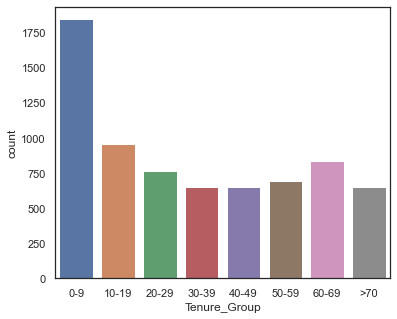

In [72]:
print((df['Tenure_Group'].value_counts()/df.shape[0])*100)
sns.set(rc = {'figure.figsize':(6,5)}, style='white')
sns.countplot(df['Tenure_Group']);

In [73]:
df.groupby('Tenure_Group')[['Churn']].mean()
# We can see here that the shorter the tenure, the greater the rate of churn.

Churn
Tenure_Group          
0-9           0.500814
10-19         0.325289
20-29         0.230971
30-39         0.220521
40-49         0.182099
50-59         0.143478
60-69         0.091346
>70           0.035330

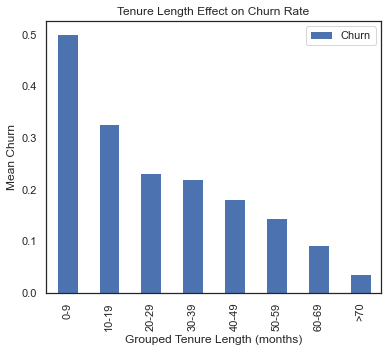

In [74]:
bar_tg = df.groupby('Tenure_Group')[['Churn']].mean()

bar_tg.plot(kind='bar', title='Tenure Length Effect on Churn Rate', ylabel='Mean Churn',
         xlabel='Grouped Tenure Length (months)', figsize=(6, 5));

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Churn            0     1
Tenure_Group            
0-9           49.9  50.1
10-19         67.5  32.5
20-29         76.9  23.1
30-39         77.9  22.1
40-49         81.8  18.2
50-59         85.7  14.3
60-69         90.9   9.1
>70           96.5   3.5

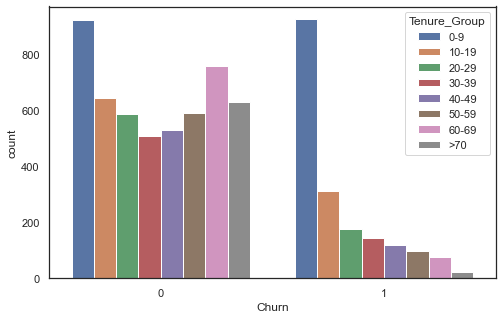

In [75]:
sns.set(rc = {'figure.figsize':(8,5)}, style='white')
sns.countplot(df['Churn'], hue= df['Tenure_Group']);
pd.crosstab(df['Tenure_Group'], df['Churn']).apply(lambda x: round((x/x.sum())*100,1), axis=1)

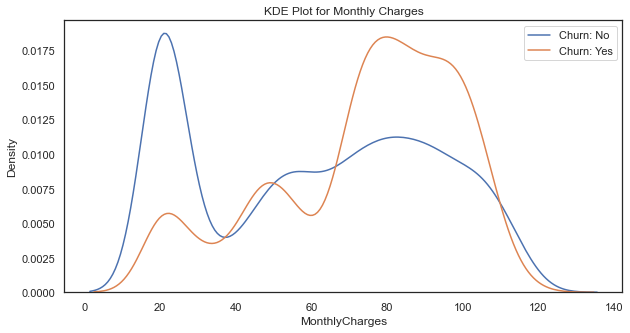

In [76]:
plt.figure(figsize=(10, 5))
plt.title("KDE Plot for Monthly Charges")
sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='Churn: No')
sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churn: Yes')
plt.legend();

# Customers with higher monthly charges are more likely to churn

### MULTI-VARIABLE ANALYSIS

In [77]:
df.pivot_table(index=['gender','SeniorCitizen'], values='Churn',aggfunc='mean')
# There is also the same distribution of senior and non-senior customers of each gender.

Churn
gender SeniorCitizen          
0      0              0.233277
       1              0.411150
1      0              0.239794
       1              0.422535

In [78]:
df.pivot_table(index=['PhoneService','InternetService'], values='Churn',aggfunc='mean')

Churn
PhoneService InternetService          
0            0                0.250000
1            0                0.166475
             1                0.418928
             2                0.074342

In [79]:
df.pivot_table(index=['Tenure_Group','Contract'], values='Churn',aggfunc='mean')

Churn
Tenure_Group Contract          
0-9          0         0.528868
             1         0.097222
             2         0.000000
10-19        0         0.403005
             1         0.097403
             2         0.000000
20-29        0         0.331967
             1         0.064356
             2         0.013889
30-39        0         0.341954
             1         0.112745
             2         0.019802
40-49        0         0.320611
             1         0.131579
             2         0.025316
50-59        0         0.279570
             1         0.134545
             2         0.043668
60-69        0         0.215517
             1         0.128302
             2         0.037694
>70          0         0.181818
             1         0.097222
             2         0.024648

In [83]:
df_filtered.pivot_table(index=['FamilySize','AdditionalInternetServices'], values='Churn',aggfunc='mean')
# Of those customers with internet service, those with additional internet services have around 20%
# lower churn rates, regardless of family size.

Churn
FamilySize AdditionalInternetServices          
0          0                           0.257688
           1                           0.474494
1          0                           0.169856
           1                           0.354839
2          0                           0.071685
           1                           0.263158

**Conclusion**

Seniors have a higher churn rate than non-senior customers, by about 16%. The company should try to attract the business of younger customers. <br>
Family size directly impacts churning rate: customers of increasing family size having decreasing churning rates. Single individuals are about 10% more likely to churn than those with a "small" family, who are about 10% more likely to churn than those with a "large" family.<br>
Customers with DSL were nearly 23% less likely to churn than those with Fiber optic internet, which is something that the company needs to investigate further.<br>
Among customers with internet service, the churning rate is around 20% higher in those customers without additional internet services (online security, online backup, device protection, tech support, streaming TV, streaming movies) compared to those with at least one such service. The company should encourage customers to sign-up for these services. <br>
Customers with shorter term contract have greater churn rates than those with longer term contracts (with churn rates around 43%, 11% and 3% in customers with month-to-month, one year and two year contracts, respectively). Clearly, the company should investigate ways of appealing to customers to sign longer term contracts, as this greatly effects churn rate.<br>
Although paperless billing affected churn rate, with customers on paperless bills being about 17% more likely to churn, this mere association probably shouldn't be translated directly into customer retention recommendations.<br>
Automating the payment method makes the customers more likely to stay by roughly 20% more than electronic checks. The comapny should automate their payment methods and offer incentives for customers to choose automated payments. <br>
Tenure with the company greatly effects churn rate, with increasing tenure bringing decreasing churn rate. For example, customers with less than 10 months tenure had a churn rate about 50%, whereas customers with over 20 months tenture had churn rates under 23% (falling to under 10% after 5+ years tenure).